In [1]:
# Import Library
import numpy as np  
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

# Data Splitting
from sklearn.model_selection import train_test_split 

# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# Missing Values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Binning
from sklearn.preprocessing import KBinsDiscretizer

# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# Column Transfornmer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline

# Cross Validation
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold

# Modeling
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_validate

# Joblib
import joblib

# SHAP
import shap

# PDP
from sklearn.inspection import PartialDependenceDisplay

# Metrics
from sklearn.metrics import get_scorer_names
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score


> # **Background & Context**

> **Background**

Daegu’s urban landscape faces increasing housing demands due to limited residential land availability and concentrated commercial activity. Apartments serve as a critical housing solution, with pricing influenced by multiple internal and external factors.  

> **Problem Statements**

Current apartment pricing practices present challenges for property owners:  

- **Price Determination Complexity**  
  - Owners and real estate companies set unit prices independently when listing on platforms  
  - Market-aligned pricing requires continuous monitoring of dynamic conditions  

- **Pricing Accuracy Risks**  
  - Overpriced units experience extended time-on-market and reduced buyer interest  
  - Underpriced units sacrifice potential profit margins  

- **Market Responsiveness Gap**  
  - Manual price adjustments lag behind rapid market fluctuations  
  - Limited access to comprehensive pricing benchmarks creates valuation uncertainty  

This situation creates a need for data-driven pricing tools that balance market competitiveness with optimal returns.  

> **Project Objectives**

**1. Develop a Predictive Pricing Model**  
   - Build a machine learning model to estimate Daegu apartment prices based on key internal and external factors.  
   - Achieve a minimum **R² ≥ 80%** to ensure reliable price explanations.  

**2. Improve Pricing Accuracy**  
   - Reduce prediction errors to **< ₩40,000 MAE** to support competitive yet profitable listings.  
   - Minimize **MAPE to < 20%** for consistent pricing guidance.  

**3. Provide Actionable Insights**  
   - Generate clear pricing recommendations for owners.

> **Stakeholders**

**Primary Stakeholders (Direct Users)**  
- **Apartment Owners**  
  - Need: Prevent profit loss from incorrect pricing  
  - Benefit: Science-backed price guidance balancing competitiveness and returns  

- **Real Estate Agents**  
  - Need: Credible valuations to justify prices to clients  
  - Benefit: Automated comps and market analytics  

**Secondary Stakeholders (Platform Partners)**  
- **Property Listing Platforms**  
  - Need: Accurate listings to maintain user trust  
  - Benefit: Reduced price disputes and faster transactions  

**Tertiary Stakeholders (Public Sector)**  
- **Local Government**  
  - Need: Housing market visibility  
  - Benefit: Data for affordability monitoring and policy-making  

> **Features**

| Feature Name                     | Description                                      |
|----------------------------------|--------------------------------------------------|
| `HallwayType`                    | Type of apartment hallway (terraced/mixed/corridor) |
| `TimeToSubway`                   | Time to nearest subway station (e.g., "0-5min")  |
| `SubwayStation`                  | Name of the nearest subway station              |
| `N_FacilitiesNearBy(ETC)`        | Number of miscellaneous facilities nearby       |
| `N_FacilitiesNearBy(PublicOffice)` | Number of public office facilities nearby      |
| `N_SchoolNearBy(University)`     | Number of nearby universities                   |
| `N_Parkinglot(Basement)`         | Number of basement parking spots                |
| `YearBuilt`                      | Construction year of the apartment              |
| `N_FacilitiesInApt`              | Number of facilities within the apartment       |
| `Size(sqft)`                     | Apartment size in square feet                   |
| `SalePrice`                      | Sale price (in South Korean Won)                |

> # **Data Loading**

In [2]:
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [3]:
apartment_df = df.copy()
apartment_df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


> # **EDA & Data Cleaning**

In [4]:
apartment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [5]:
apartment_df.shape

(4123, 11)

In [6]:
apartment_df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [7]:
apartment_df.columns

Index(['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice'],
      dtype='object')

In [8]:
num_cols = ['Size(sqf)', 'SalePrice']
num_cols

['Size(sqf)', 'SalePrice']

In [9]:
cat_cols = ['HallwayType', 'TimeToSubway', 'SubwayStation', 'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt']
cat_cols

['HallwayType',
 'TimeToSubway',
 'SubwayStation',
 'N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_SchoolNearBy(University)',
 'N_Parkinglot(Basement)',
 'YearBuilt']

In [10]:
column_names = list(apartment_df.columns)

unique_values = []
for column in apartment_df.columns:
    unique_values.append(apartment_df[column].unique())

unique_values_df = pd.DataFrame({
    'Column Name': column_names,
    'Unique Values': unique_values
})

pd.set_option('display.max_colwidth', None)
unique_values_df

,Column Name,Unique Values
0,HallwayType,"[terraced, mixed, corridor]"
1,TimeToSubway,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


In [11]:
apartment_df.duplicated().sum()

1422

In [12]:
apartment_df.drop_duplicates(inplace=True)

In [13]:
apartment_df.shape

(2701, 11)

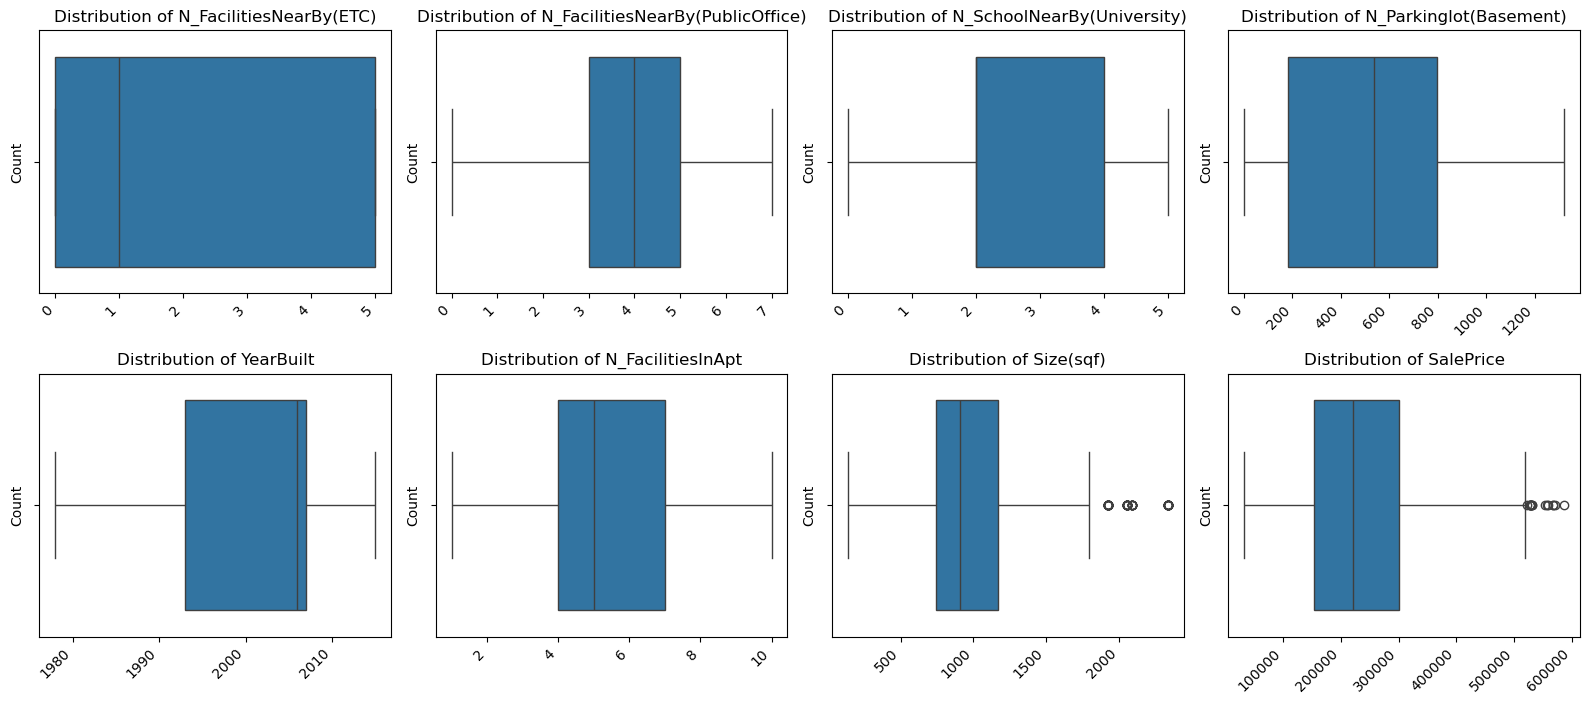

In [14]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(apartment_df, x=col)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(fontsize=10)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

1.  `N_SchoolNearBy(University)`: Dominated by Lower Counts <br><br>
2.  `Distribution of SalePrice`: Right-Skewed with High-Value Apartments<br><br>
3.  `N_FacilitiesNearBy(PublicOffice)`: Centered at Lower-Mid Count<br><br>
4.  `N_FacilitiesInApt`: Lower Counts More Common, Right-Skewed<br><br>
5.  `N_FacilitiesNearBy(ETC)`: Concentrated at Lower Counts, Right-Skewed<br><br>
6.  `YearBuilt`: Skewed Towards Newer Buildings<br><br>
7.  `N_Parkinglot(Basement)`: Broad Range, Highly Varied<br><br>
8.  `Size(sqf)`: Right-Skewed with Larger Apartments as Outliers<br><br>

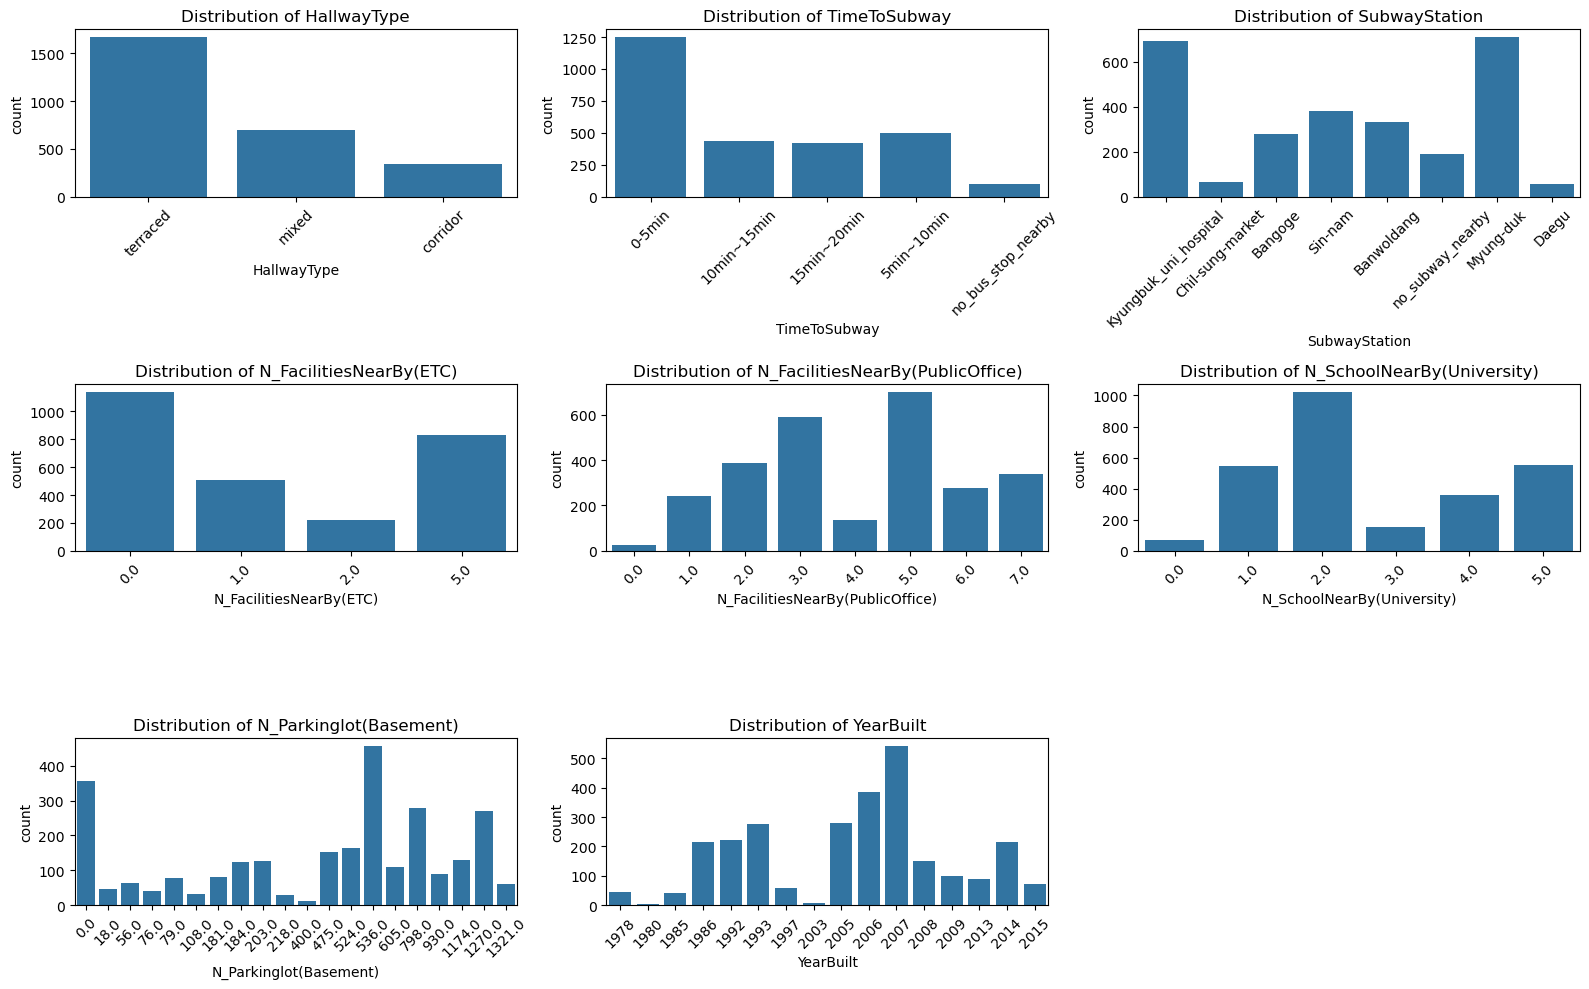

In [15]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=apartment_df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1.  `Distribution of HallwayType`: Dominant Preference for Teraced Hallway Type<br><br>
2.  `Distribution of TimeToSubway`: Strong Preference for Close Proximity<br><br>
3.  `Distribution of SubwayStation`: Diverse but Strong Preference for Kyungbuk Uni Hospital & Myungduk Hallway Subway Station<br><br>
4.  `Distribution of N_FacilitiesNearBy(ETC)`: Peaks at Low and High Counts<br><br>
5.  `Distribution of N_FacilitiesNearBy(PublicOffice)`: Spread Out with Lower Peaks<br><br>
6.  `Distribution of N_SchoolNearBy(University)`: Concentrated at Lower Counts<br><br>
7.  `Distribution of N_Parkinglot(Basement)`: Highly Varied, Sparse High Counts<br><br>
8.  `Distribution of YearBuilt`: Concentration in Newer Years

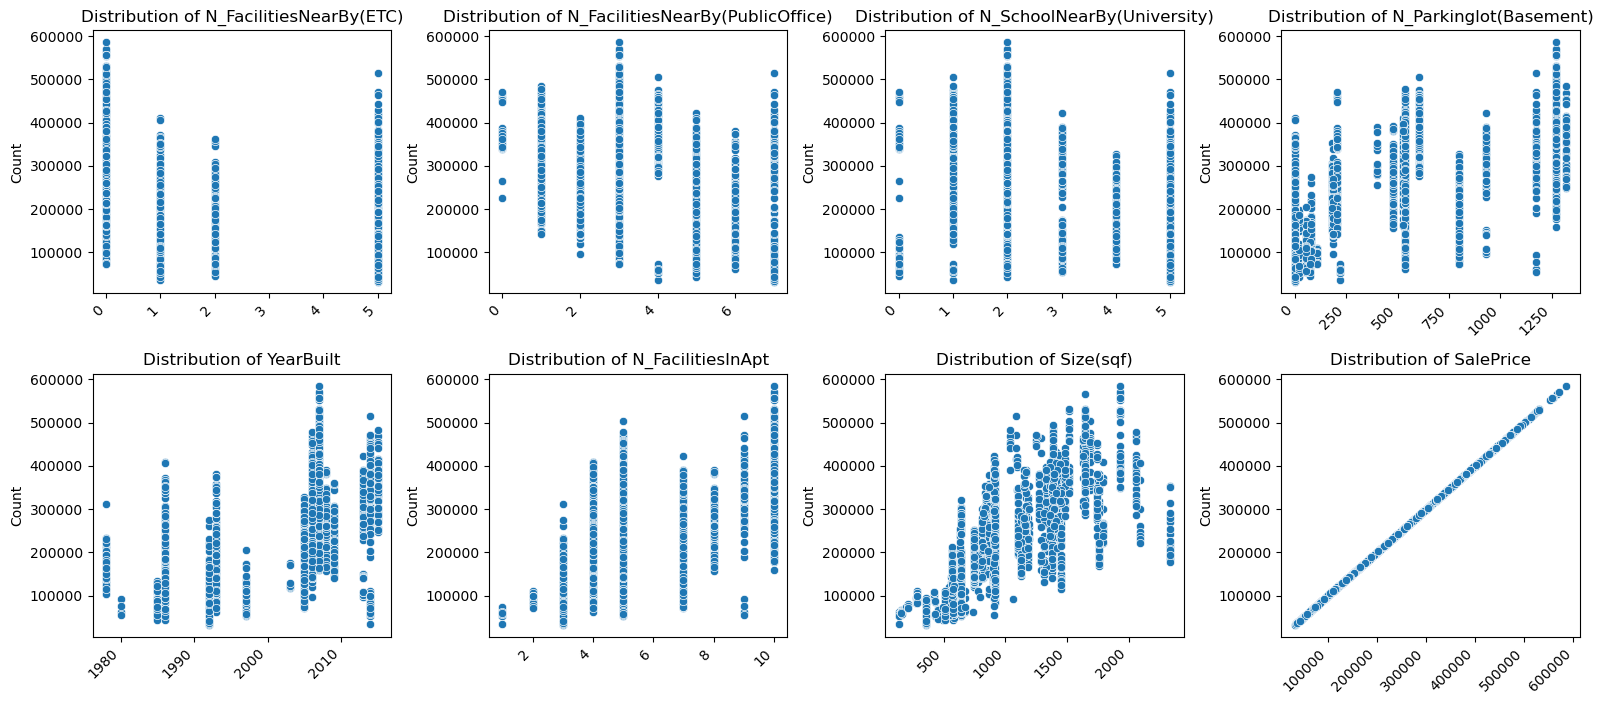

In [16]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(data=apartment_df, x=col, y='SalePrice')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(fontsize=10)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=10)
plt.tight_layout()
plt.show()

1.  `N_Parkinglot(Basement)`: Positive Trend with High Dispersion<br><br>
2.  `N_SchoolNearBy(University)`: Negative Trend<br><br>
3.  `N_FacilitiesNearBy(PublicOffice)`: Negative Trend with Broad Price Ranges<br><br>
4.  `N_FacilitiesNearBy(ETC)`: Negative Trend, Wide Price Spreads<br><br>
5.  `SalePrice`: Self-Correlation Confirmation<br><br>
6.  `Size(sqf)`: Strong Positive Trend, Increasing Variance<br><br>
7.  `N_FacilitiesInApt`: Positive Step-Wise Relationship<br><br>
8.  `YearBuilt`: Strong Positive Trend with Clear Clusters

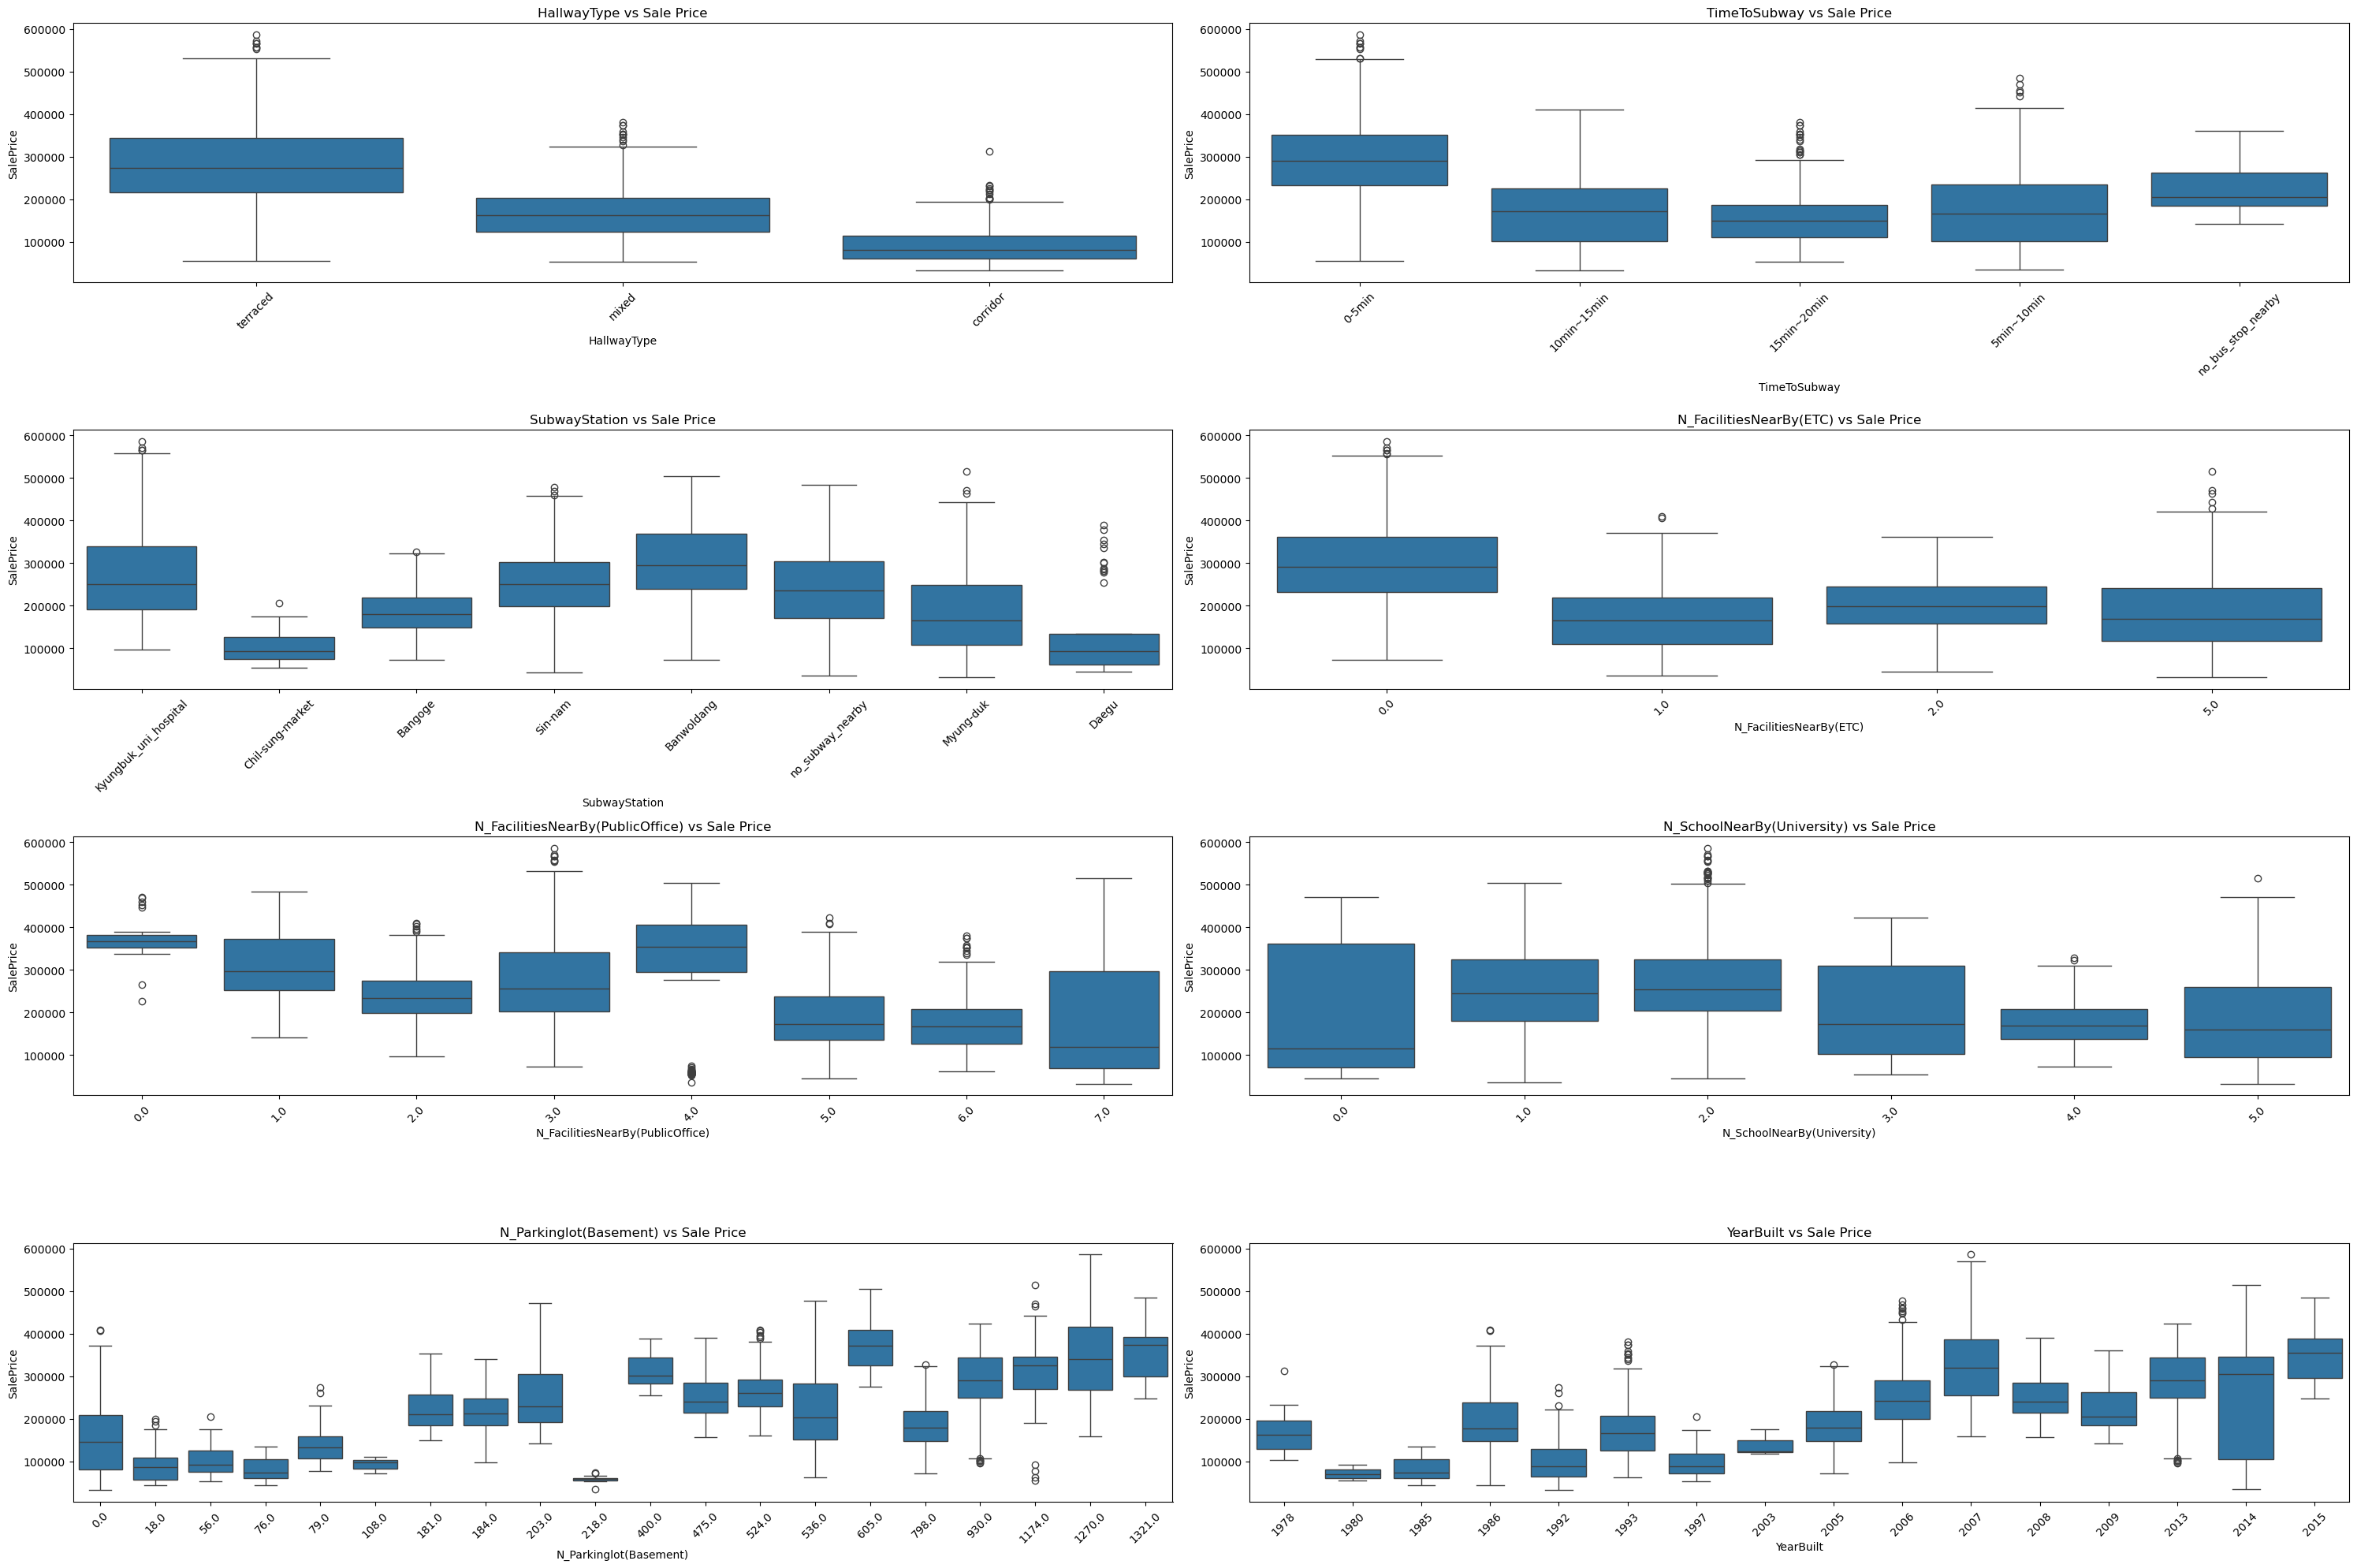

In [17]:
plt.figure(figsize=(30, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=apartment_df, x=col, y='SalePrice')
    plt.title(f'{col} vs Sale Price')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1.  `TimeToSubway vs Sale Price`: Optimal Proximity is Key<br><br>
2.  `SubwayStation vs Sale Price`: Station-Specific Value Differences<br><br>
3.  `N_SchoolNearBy(University) vs Sale Price`: Negative Trend<br><br>
4.  `YearBuilt vs Sale Price`: Clear Positive Progression<br><br>
5.  `N_FacilitiesNearBy(PublicOffice) vs Sale Price`: Negative Impact<br><br>
6.  `N_FacilitiesNearBy(ETC) vs Sale Price`: Negative Impact at Higher Counts<br><br>
7.  `HallwayType vs Sale Price`: Significant Value Differences by Type<br><br>
8.  `N_Parkinglot(Basement) vs Sale Price`: Complex, Generally Positive with Variability

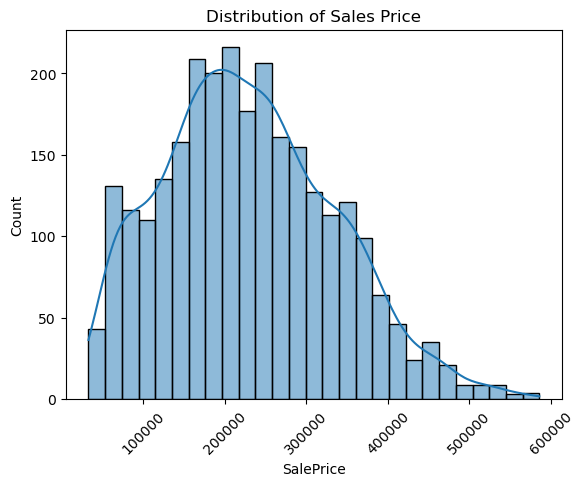

In [18]:
sns.histplot(apartment_df, x='SalePrice', kde=True)
plt.title(f'Distribution of Sales Price')
plt.xticks(rotation=45)
plt.show()

In [19]:
shapiro_stat, shapiro_p = stats.shapiro(apartment_df['SalePrice'])
if shapiro_p < 0.05:
    print(f"Shapiro-Wilk Test: Stat={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
    print("Sale Price is NOT normally distributed.")
else:
    print(f"Shapiro-Wilk Test: Stat={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
    print("Sale Price is normally distributed.")

Shapiro-Wilk Test: Stat=0.9829, p-value=0.0000
Sale Price is NOT normally distributed.


In [20]:
sale_price_skewness = apartment_df['SalePrice'].skew()
if sale_price_skewness > 0:
    skew_type = "right-skewed"
elif sale_price_skewness < 0:
    skew_type = "left-skewed"

print(f"Skewness: {sale_price_skewness:.4f}, Type: {skew_type}")

Skewness: 0.3861, Type: right-skewed


The distribution of `SalePrice` is **right-skewed (positively skewed)**. The bulk of the data (the peak) is concentrated on the lower side of the price range (around $150,000 - $250,000), with a long tail extending towards higher sale prices (up to $600,000).


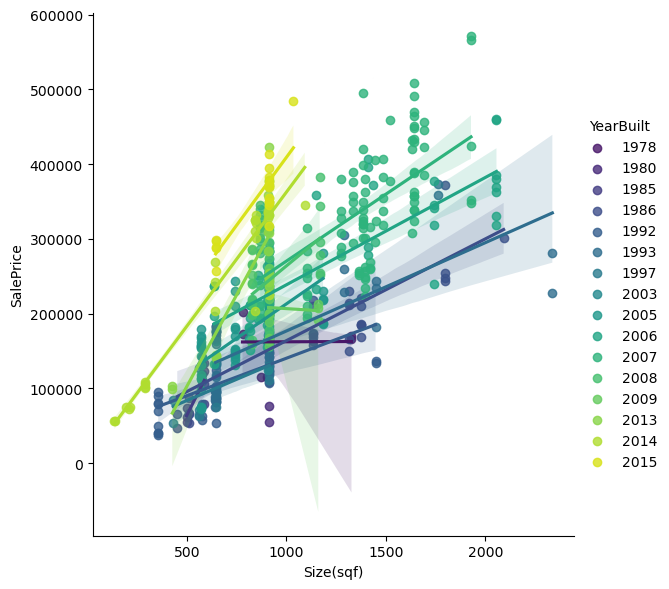

In [21]:
sns.lmplot(x='Size(sqf)', y='SalePrice', hue='YearBuilt', 
           data=apartment_df.sample(500, random_state=8), palette='viridis', height=6)

This plot demonstrates a **strong interactive effect between `Size(sqf)` and `YearBuilt` on `SalePrice`**. The value derived from apartment size is significantly amplified for newer constructions, while older buildings see a less pronounced price increase with size.

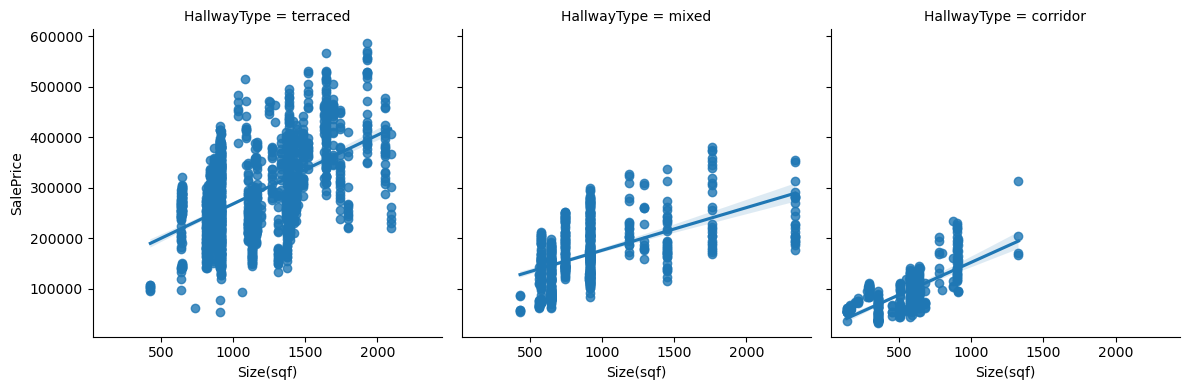

In [22]:
sns.lmplot(x='Size(sqf)', y='SalePrice', col='HallwayType', data=apartment_df, height=4)

This plot unequivocally confirms that `HallwayType` is a **highly influential feature with a strong interaction effect** on `Size(sqf)` and `SalePrice`. The specific type of hallway not only dictates the general price range an apartment falls into (with 'terraced' being the most valuable, followed by 'mixed', then 'corridor'), but it also influences the rate at which `SalePrice` increases with `Size(sqf)`.

Text(0.5, 1.0, 'Correlation Matrix')

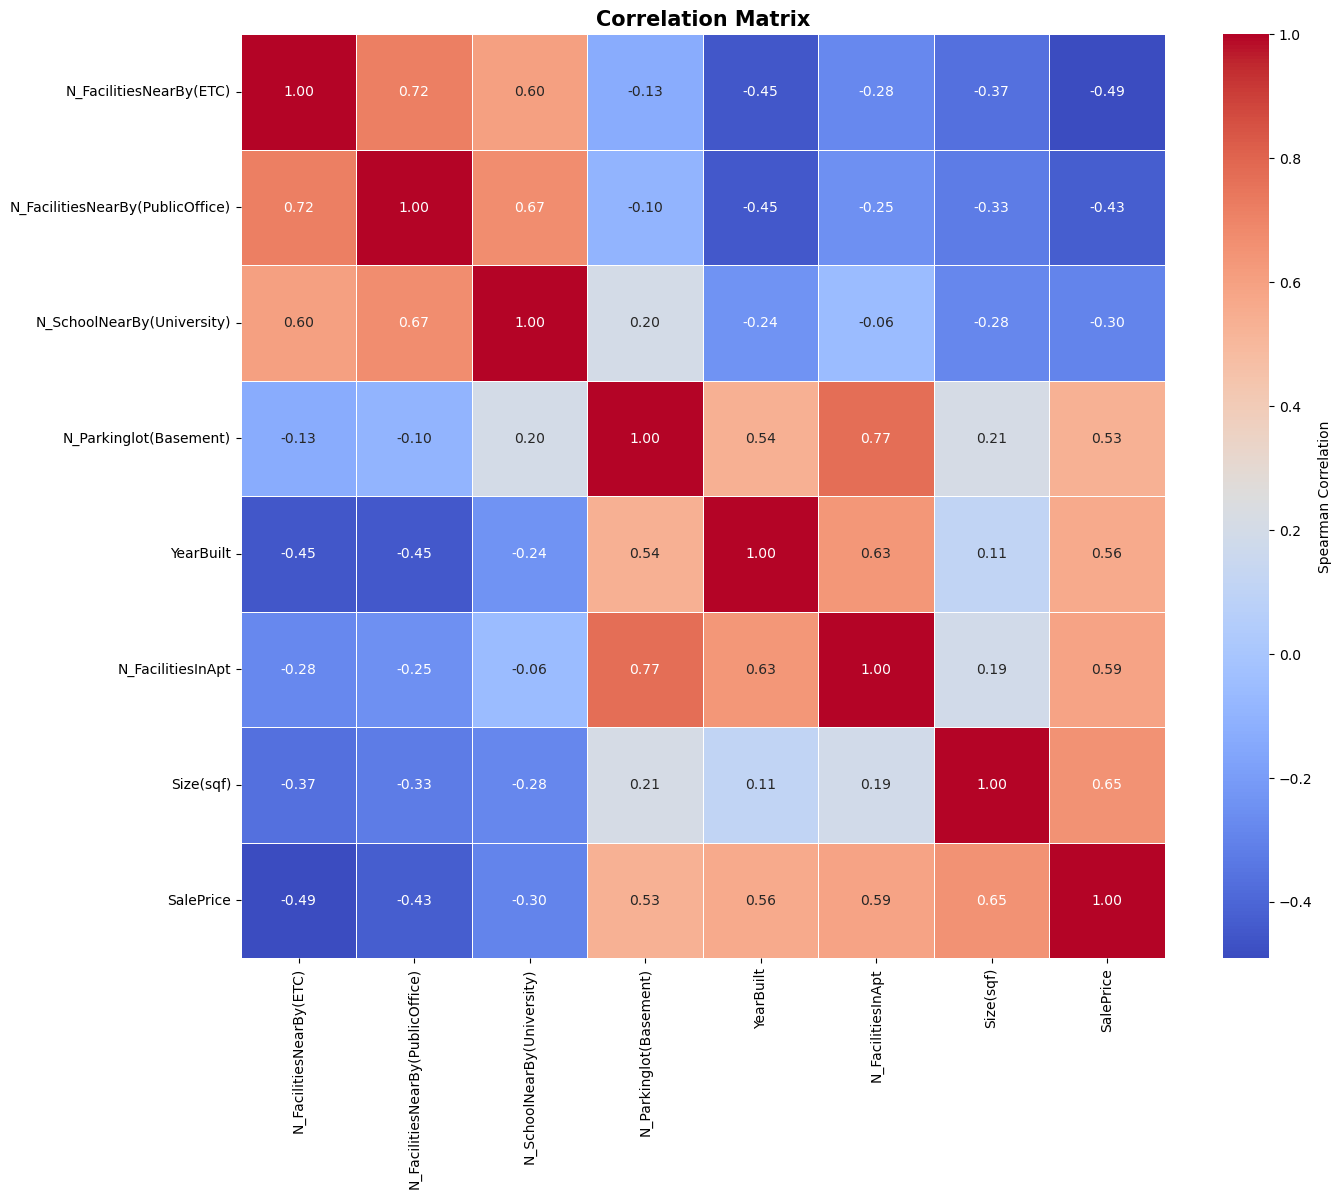

In [23]:
cols_corr= apartment_df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 12))
corr = cols_corr.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5,
            cbar_kws={'label': 'Spearman Correlation'}, annot_kws={'size': 10}, xticklabels=corr.columns, yticklabels=corr.columns)

plt.title('Correlation Matrix', size=15, weight='bold')

* **Strongest Positive Correlations with `SalePrice`:**
    * `Size(sqf)` (0.65): Larger apartments tend to have higher prices
    * `N_FacilitiesInApt` (0.59): More facilities within the apartment are associated with higher prices
    * `YearBuilt` (0.56): Newer buildings generally have higher prices.
    * `N_Parkinglot(Basement)` (0.53): More basement parking is associated with higher prices.

* **Strongest Negative Correlations with `SalePrice`:**
    * `N_FacilitiesNearBy(ETC)` (-0.49): Higher count of these facilities is associated with lower prices
    * `N_FacilitiesNearBy(PublicOffice)` (-0.43): More public offices nearby are linked to lower prices
    * `N_SchoolNearBy(University)` (-0.30): More universities nearby are also associated with lower prices

**Outlier Treatment Decision:**  
After thorough exploratory analysis through visual inspection (boxplots, scatter plots, and distribution charts), no extreme outliers were identified in the dataset. Given the already limited sample size (n=2,701) and the absence of clearly erroneous or anomalous data points that would distort our analysis, all data will be retained. This approach:  

1. Preserves valuable information in our constrained dataset  
2. Avoids potential bias from subjective outlier removal  
3. Maintains statistical power for subsequent modeling  

In [24]:
apartment_df.to_excel('daegu_apartment_cleaned.xlsx', index=False)

> # **Data Splitting**

In [25]:
X = apartment_df.drop(columns='SalePrice')
X

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf)
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743
...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818
4117,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451


In [26]:
y = apartment_df['SalePrice']
y

0       346017
1       150442
2        61946
3       165486
4       311504
         ...  
4116    290265
4117    345132
4118    323008
4119    242477
4121     73451
Name: SalePrice, Length: 2701, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                test_size = 0.20,
                                                random_state = 88)

> # **Data Preprocessing**

- OneHotEncoder = 'TimeToSubway', 'SubwayStation' <br><br>
- OrdinalEncoder = 'HallwayType' (\n) <br><br>
- RobustScaler = 'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)'

In [28]:
encode_map = [{
        'col': 'HallwaType', 
        'mapping': {
            'corridor': 1,
            'mixed': 2,
            'terraced': 3
        }}]

In [29]:
ordinal_scaler = Pipeline(
    [('ordinal',OrdinalEncoder(encode_map)),
    ('robust', RobustScaler())]
)

In [30]:
transformers = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['TimeToSubway', 'SubwayStation']),
    ('ordinal', ordinal_scaler, ['HallwayType']),
    ('robust',RobustScaler(), ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)'])
    ],

     remainder='passthrough'
)

transformers

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(),
                                 ['TimeToSubway', 'SubwayStation']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(verbose=[{'col': 'HallwaType',
                                                                           'mapping': {'corridor': 1,
                                                                                       'mixed': 2,
                                                                                       'terraced': 3}}])),
                                                 ('robust', RobustScaler())]),
                                 ['HallwayType']),
                                ('robust', RobustScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_Parkinglot(Basement)', 'YearBuilt',
                                  'N_FacilitiesInApt', 'Size(sqf)'])])

In [31]:
X_train_transformed = transformers.fit_transform(X_train)
X_test_transformed = transformers.transform(X_test)

In [32]:
feature_names_out = transformers.get_feature_names_out()
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names_out)
X_train_transformed_df

,onehot__TimeToSubway_0-5min,onehot__TimeToSubway_10min~15min,onehot__TimeToSubway_15min~20min,onehot__TimeToSubway_5min~10min,onehot__TimeToSubway_no_bus_stop_nearby,onehot__SubwayStation_Bangoge,onehot__SubwayStation_Banwoldang,onehot__SubwayStation_Chil-sung-market,onehot__SubwayStation_Daegu,onehot__SubwayStation_Kyungbuk_uni_hospital,...,onehot__SubwayStation_Sin-nam,onehot__SubwayStation_no_subway_nearby,ordinal__HallwayType,robust__N_FacilitiesNearBy(ETC),robust__N_FacilitiesNearBy(PublicOffice),robust__N_SchoolNearBy(University),robust__N_Parkinglot(Basement),robust__YearBuilt,robust__N_FacilitiesInApt,robust__Size(sqf)
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.5,1.0,-0.740681,-1.000000,-0.666667,0.009070
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.2,-1.0,0.0,-0.019449,0.071429,-0.333333,0.009070
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.8,1.5,1.5,-0.868720,-1.000000,-0.666667,-1.258503
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.5,0.0,-0.839546,-1.428571,-0.666667,-0.911565
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.8,1.0,1.5,0.000000,-0.928571,-0.333333,3.235828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.2,-1.5,0.0,0.000000,0.000000,0.000000,1.888889
2156,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.8,1.5,1.5,1.034036,0.571429,1.333333,0.412698
2157,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.2,0.0,-0.5,0.111831,0.071429,0.000000,1.299320
2158,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,1.5,0.5,-0.777958,-0.642857,0.000000,-1.088435


In [33]:
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names_out)
X_test_transformed_df

,onehot__TimeToSubway_0-5min,onehot__TimeToSubway_10min~15min,onehot__TimeToSubway_15min~20min,onehot__TimeToSubway_5min~10min,onehot__TimeToSubway_no_bus_stop_nearby,onehot__SubwayStation_Bangoge,onehot__SubwayStation_Banwoldang,onehot__SubwayStation_Chil-sung-market,onehot__SubwayStation_Daegu,onehot__SubwayStation_Kyungbuk_uni_hospital,...,onehot__SubwayStation_Sin-nam,onehot__SubwayStation_no_subway_nearby,ordinal__HallwayType,robust__N_FacilitiesNearBy(ETC),robust__N_FacilitiesNearBy(PublicOffice),robust__N_SchoolNearBy(University),robust__N_Parkinglot(Basement),robust__YearBuilt,robust__N_FacilitiesInApt,robust__Size(sqf)
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.2,0.0,-0.5,0.111831,0.071429,0.000000,1.299320
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,-0.570502,0.000000,0.000000,-0.621315
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.2,-1.0,-0.5,-0.539708,0.214286,0.000000,0.000000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.8,1.5,1.5,1.034036,0.571429,1.333333,-0.612245
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2,-0.5,-0.5,-0.575365,0.000000,-0.333333,-0.015873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.2,-1.5,-0.5,1.272285,0.642857,1.666667,0.000000
537,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.2,-1.0,0.0,-0.019449,0.071429,-0.333333,0.437642
538,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.2,-0.5,0.0,-0.693679,0.571429,-1.000000,-1.410431
539,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.8,0.5,1.0,0.424635,-0.071429,0.666667,0.009070


> # **Cross Validation**

In [34]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

In [35]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=88),
    'Gradient Boost': GradientBoostingRegressor(random_state=88),
    'XGBoost': XGBRegressor(random_state=88),
    'Random Forest': RandomForestRegressor(random_state=88)
}

In [36]:
metrics = {
    'MAE': 'neg_mean_absolute_error',
    'MAPE': 'neg_mean_absolute_percentage_error', 
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2'
}

To comprehensively evaluate the regression models, four key metrics were utilized:

* **Mean Absolute Error (MAE):** This metric measures the average magnitude of the errors in the same units as the `SalePrice`, providing a straightforward understanding of the typical prediction error.<br><br>
* **Mean Absolute Percentage Error (MAPE):** MAPE indicates the average percentage deviation of the predictions from the actual values, which is particularly useful for assessing accuracy relative to the target's scale.<br><br>
* **Root Mean Squared Error (RMSE):** RMSE calculates the square root of the average of squared errors, giving higher penalty to larger errors and maintaining the same units as `SalePrice`. It's sensitive to outliers and provides insight into the typical magnitude of prediction errors.<br><br>
* **R-squared (R²):** R² represents the proportion of the variance in `SalePrice` that is predictable from the independent variables, indicating how well the model explains the variability in apartment prices.

In [37]:
results = []
for name, model in models.items():
    pipeline = Pipeline([
        ('transformers', transformers),
        ('model', model)
    ])
    
    scores = cross_validate(
        pipeline, 
        X_train, 
        y_train,
        cv=5,
        scoring=metrics,
        n_jobs=-1
    )
    
    results.append({
        'Model': name,
        'MAE': -scores['test_MAE'].mean(),
        'MAPE': -scores['test_MAPE'].mean(),
        'RMSE': -scores['test_RMSE'].mean(),
        'R2': scores['test_R2'].mean()
    })

df_score = pd.DataFrame(results)
df_score

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.952e+10, tolerance: 1.855e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.829e+10, tolerance: 1.894e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.923e+10, toler

,Model,MAE,MAPE,RMSE,R2
0,Linear Regression,42514.643831,0.219337,52610.257623,0.745856
1,Ridge,42600.757805,0.220306,52614.223149,0.745861
2,Lasso,42518.011779,0.219376,52610.150631,0.745858
3,KNN,39017.888148,0.201462,49020.132962,0.780247
4,Decision Tree,37439.888702,0.191430,46536.950312,0.801862
5,Gradient Boost,37468.281693,0.191695,46210.415465,0.804714
6,XGBoost,37430.555469,0.190978,46459.182031,0.802589
7,Random Forest,37422.504017,0.191759,46466.390197,0.802538


**Performance Summary**
Upon evaluation, **Gradient Boosting and XGBoost emerged as the top-performing models**, demonstrating highly competitive predictive capabilities.

* **Gradient Boosting** achieved the **lowest RMSE (46210.42)** and the **highest R² (0.8047)**, indicating a slightly better performance in overall error magnitude and explained variance of the `SalePrice`.<br><br>
* **XGBoost** showed a marginal advantage in **MAE (37430.56)** and **MAPE (0.1910)**, suggesting it has a slightly lower average absolute error and percentage error in its predictions.

In conclusion, both Gradient Boosting and XGBoost are exceptionally strong candidates for this prediction task.

> # **Model Fitting**

In [38]:
benchmark_model = {
    'Gradient Boost': GradientBoostingRegressor(random_state=88),
    'XGBoost': XGBRegressor(random_state=88),
}

benchmark_results = []

for name, model in benchmark_model.items():
    model_pipeline = Pipeline([
        ('transformers', transformers),
        ('model', model)
    ])
    
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    
    benchmark_results.append({
        'Model': name,
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    })

df_benchmark_results = pd.DataFrame(benchmark_results)
df_benchmark_results

,Model,RMSE,MAE,MAPE,R2
0,Gradient Boost,47040.408000,37816.519495,0.194162,0.802198
1,XGBoost,47356.978282,38003.828125,0.194982,0.799526


**Performance Summary**

* **Gradient Boosting** demonstrates slightly superior predictive accuracy and lower errors across all metrics compared to XGBoost.
    * It achieves a **lower RMSE (47,040)**, indicating better overall error magnitude.
    * Its **MAE (37,817)** is also lower, showing a smaller average absolute prediction error.
    * The **MAPE (19.42%)** for Gradient Boosting is marginally better, reflecting a slightly lower average percentage error.
    * Furthermore, Gradient Boosting explains a higher proportion of variance with a **R² of 0.8022**, compared to XGBoost's 0.7995.

* **XGBoost**, while competitive, shows slightly higher prediction errors across RMSE, MAE, and MAPE, and a marginally lower R² value.

#### **Conclusion**

Based on this evaluation, **Gradient Boosting performs consistently better** across all key performance metrics (RMSE, MAE, MAPE, and R²).

> # **Hyperparameter Tuning**

The **hyperparameters** that will be tuned for **GradientBoostingRegressor**:

* **Number of Boosting Stages (`n_estimators`):** Evaluating 50 to 500 trees, in steps of 50.
* **Learning Rate (`learning_rate`):** Testing values from 0.0 to 2.0 (exclusive upper bound), with a step of 0.1.
* **Maximum Tree Depth (`max_depth`):** Exploring depths from 3 to 10 levels.
* **Minimum Samples Required to Split (`min_samples_split`):** Considering thresholds from 2 to 50 samples.
* **Minimum Samples in a Leaf (`min_samples_leaf`):** Evaluating leaf sizes from 1 to 50 samples.

**Reasons for Tuning these Parameters:**

* **Model Complexity:** To find the optimal balance between bias and variance using tree depth and count.
* **Learning Speed:** To control the contribution of each tree in the ensemble for robust learning.
* **Overfitting Prevention:** To regularize tree growth and improve generalization to new data.

In [39]:
gradient_model = Pipeline([
        ('transformers', transformers),
        ('model', GradientBoostingRegressor(random_state=88))
    ])

param_dist = {
    'model__n_estimators': np.arange(50, 501, 50),
    'model__learning_rate': np.arange(0.0, 2.1, 0.1),
    'model__max_depth': np.arange(3, 11, 1),
    'model__min_samples_split': np.arange(2, 51, 1),
    'model__min_samples_leaf': np.arange(1, 51, 1)
}

metrics = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

In [40]:
# Remove the following comment markers to enable Grid Search:

# grid_search = GridSearchCV(
#     estimator = xgb_model,
#     param_grid = param_dist,
#     cv = 5,
#     scoring = 'neg_root_mean_squared_error',
#     n_jobs = -1,
#     verbose = 1
# )

In [41]:
# Remove the following comment markers to enable Grid Search:

#grid_search.fit(X_train,y_train)
#print(f"Best Parameters: {grid_search.best_params_}")
#print(f"Best RMSE: {-grid_search.best_score_}")

In [42]:
random_search = RandomizedSearchCV(
    estimator = gradient_model,
    param_distributions = param_dist,
    cv = 5,
    scoring = metrics,
    refit = 'RMSE',
    n_jobs = -1,
    n_iter = 50,
    random_state = 88
)

In [43]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformers',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['TimeToSubway',
                                                                                'SubwayStation']),
                                                                              ('ordinal',
                                                                               Pipeline(steps=[('ordinal',
                                                                                                OrdinalEncoder(verbose=[{'col': 'HallwaType',
                                                                                                                         'mapping': {'corridor': 1,
                                                                                                                                     'mixed': 2,
                                                                                                                                     'terraced': 3}}])),
                                                                                               ('robust',
                                                                                                RobustScaler())]),
                                                                               ['Hall...
                                        'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        'model__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])},
                   random_state=88, refit='RMSE',
                   scoring={'MAE': 'neg_mean_absolute_error', 'R2': 'r2',
                            'RMSE': 'neg_root_mean_squared_error'})

In [44]:
print(f"Best Parameters: {random_search.best_params_}")

Best Parameters: {'model__n_estimators': 350, 'model__min_samples_split': 36, 'model__min_samples_leaf': 50, 'model__max_depth': 7, 'model__learning_rate': 0.1}


In [45]:
print(f"Best RMSE: {-random_search.best_score_}")

Best RMSE: 46192.884537454374


> ## **Final Model Training**

**Before Tuning**

In [46]:
default_model = gradient_model
default_model.fit(X_train,y_train)
y_pred_train_default = default_model.predict(X_train)
y_pred_test_default = default_model.predict(X_test)
root_mean_squared_error(y_test,y_pred_test_default)


rmse = root_mean_squared_error(y_test,y_pred_test_default)
mae = mean_absolute_error(y_test,y_pred_test_default)
r2 = r2_score(y_test,y_pred_test_default)
mape = mean_absolute_percentage_error(y_test,y_pred_test_default) * 100 

print(f"RMSE: {rmse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"R²: {r2:.5f}")
print(f"MAPE: {mape:.5f}")

RMSE: 47040.40800
MAE: 37816.51950
R²: 0.80220
MAPE: 19.41617


**After Tuning**

In [47]:
best_model = random_search.best_estimator_
best_model.fit(X_train,y_train)
y_pred_train_best_model = best_model.predict(X_train)
y_pred_test_best_model = best_model.predict(X_test)

tuned_rmse = root_mean_squared_error(y_test,y_pred_test_best_model)
tuned_mae = mean_absolute_error(y_test,y_pred_test_best_model)
tuned_r2 = r2_score(y_test,y_pred_test_best_model)
tuned_mape = mean_absolute_percentage_error(y_test,y_pred_test_best_model) * 100

print(f"RMSE: {tuned_rmse:.5f}")
print(f"MAE: {tuned_mae:.5f}")
print(f"R²: {tuned_r2:.5f}")
print(f"MAPE: {tuned_mape:.5f}")

RMSE: 47144.44173
MAE: 37965.53290
R²: 0.80132
MAPE: 19.56061


The **default Gradient Boosting model** (as indicated by the better "before tuning" metrics in previous discussions) demonstrated marginally **superior performance** compared to the tuned version across all evaluated metrics: RMSE, MAE, R², and MAPE.

The differences are minimal, indicating that the default parameters are already well-suited for this dataset. Consequently, while the tuning process did not significantly degrade performance, it also **did not yield any measurable improvement** and therefore **did not add value** to the model's predictive capability in this instance.

> ## **Feature Importance**

In [48]:
X_test_transformed_df

,onehot__TimeToSubway_0-5min,onehot__TimeToSubway_10min~15min,onehot__TimeToSubway_15min~20min,onehot__TimeToSubway_5min~10min,onehot__TimeToSubway_no_bus_stop_nearby,onehot__SubwayStation_Bangoge,onehot__SubwayStation_Banwoldang,onehot__SubwayStation_Chil-sung-market,onehot__SubwayStation_Daegu,onehot__SubwayStation_Kyungbuk_uni_hospital,...,onehot__SubwayStation_Sin-nam,onehot__SubwayStation_no_subway_nearby,ordinal__HallwayType,robust__N_FacilitiesNearBy(ETC),robust__N_FacilitiesNearBy(PublicOffice),robust__N_SchoolNearBy(University),robust__N_Parkinglot(Basement),robust__YearBuilt,robust__N_FacilitiesInApt,robust__Size(sqf)
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.2,0.0,-0.5,0.111831,0.071429,0.000000,1.299320
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,-0.570502,0.000000,0.000000,-0.621315
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.2,-1.0,-0.5,-0.539708,0.214286,0.000000,0.000000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.8,1.5,1.5,1.034036,0.571429,1.333333,-0.612245
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2,-0.5,-0.5,-0.575365,0.000000,-0.333333,-0.015873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.2,-1.5,-0.5,1.272285,0.642857,1.666667,0.000000
537,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.2,-1.0,0.0,-0.019449,0.071429,-0.333333,0.437642
538,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.2,-0.5,0.0,-0.693679,0.571429,-1.000000,-1.410431
539,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.8,0.5,1.0,0.424635,-0.071429,0.666667,0.009070


In [49]:
model = gradient_model.named_steps['model']
importance = model.feature_importances_ 

feature_names = X_test_transformed_df.columns
cleaned_feature_names = [name.split('__')[-1] for name in X_test_transformed_df.columns]

feature_importance = pd.DataFrame({
    'Feature': cleaned_feature_names,
    'Importance': importance
}).sort_values('Importance', ascending=False)
feature_importance

,Feature,Importance
20,Size(sqf),0.426920
18,YearBuilt,0.370070
19,N_FacilitiesInApt,0.096658
17,N_Parkinglot(Basement),0.060230
15,N_FacilitiesNearBy(PublicOffice),0.020209
14,N_FacilitiesNearBy(ETC),0.012938
13,HallwayType,0.007729
16,N_SchoolNearBy(University),0.001885
10,SubwayStation_Myung-duk,0.000864
12,SubwayStation_no_subway_nearby,0.000537


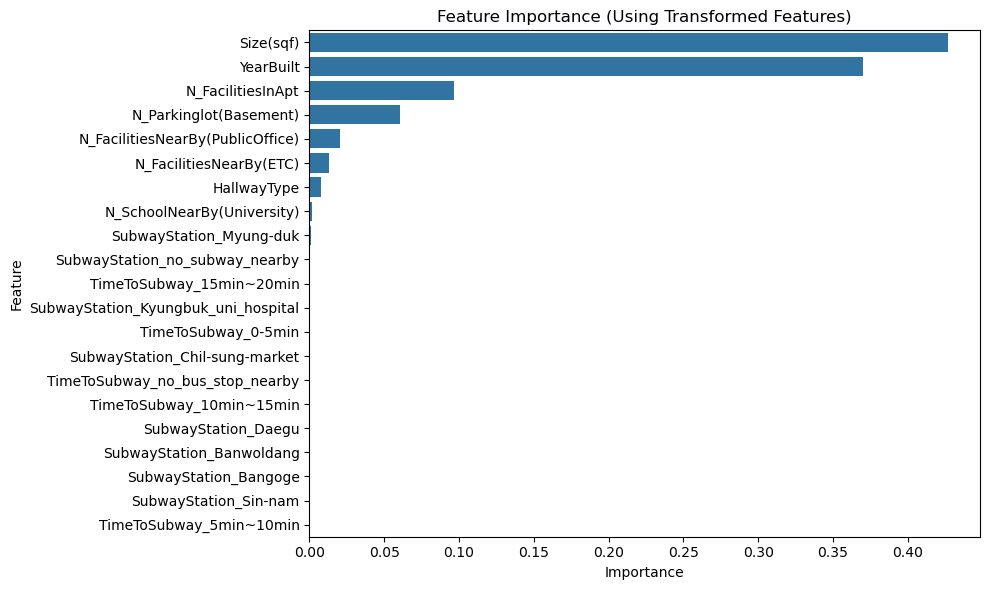

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance (Using Transformed Features)')
plt.tight_layout()
plt.show()

The analysis of feature importance reveals the following key drivers influencing apartment prices:

* **Dominant Price Drivers:**
    * Apartment Size (`Size(sqf)`) - **42.7%** impact
    * Building Age (`YearBuilt`) - **37.0%** impact
* **Significant Influencers:**
    * Facilities Within Apartment (`N_FacilitiesInApt`) - **9.7%** impact
    * Basement Parking Spots (`N_Parkinglot(Basement)`) - **6.0%** impact
* **Minor Influencers:**
    * Nearby Public Office Facilities (`N_FacilitiesNearBy(PublicOffice)`) - **2.0%** impact
    * Nearby Miscellaneous Facilities (`N_FacilitiesNearBy(ETC)`) - **1.3%** impact
    * Hallway Type (`HallwayType`) - **0.8%** impact
    * University Proximity (`N_SchoolNearBy(University)`) - **0.2%** impact
* **Negligible Impact (<0.1% each):**
    * Specific Subway Stations
    * Time to Subway<br><br>

**Conclusion:**

Apartment size and building age are the overwhelming primary determinants of price. While internal amenities (facilities, parking) are significant, external factors like subway proximity and specific local facilities have negligible influence. Buyers strongly prioritize the property's core attributes.

> ## **Model Interpretation**

In [51]:
y_pred_train = gradient_model.predict(X_train)
y_pred = best_model.predict(X_test)
root_mean_squared_error(y_test,y_pred)

df_error = pd.DataFrame({
    'Actual_Price': y_test,
    'Predicted_Price': y_pred,
    'Error': y_test - y_pred
})
df_error

,Actual_Price,Predicted_Price,Error
3103,373451,366161.605234,7289.394766
1221,97345,189879.186856,-92534.186856
383,305309,208179.616217,97129.383783
2069,241592,262299.437335,-20707.437335
1289,228318,217848.193366,10469.806634
...,...,...,...
1109,369026,378881.936383,-9855.936383
3200,287610,252398.308383,35211.691617
796,98761,94924.687296,3836.312704
1181,251327,211586.219913,39740.780087


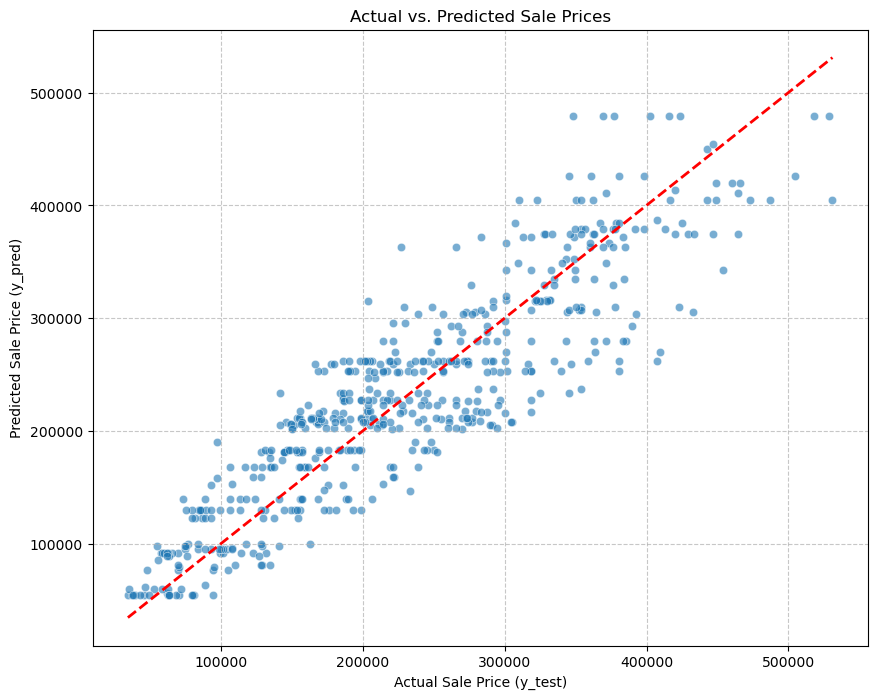

In [52]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Sale Price (y_test)")
plt.ylabel("Predicted Sale Price (y_pred)")
plt.title("Actual vs. Predicted Sale Prices")
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().ticklabel_format(style='plain', axis='x', useOffset=False)
plt.gca().ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

This plot visually reinforces that the model is **performing well overall**, with predictions generally aligning with actual prices. However, it critically highlights that the **model's confidence and accuracy decrease for higher-priced properties**, as evidenced by the increasing spread of residuals.

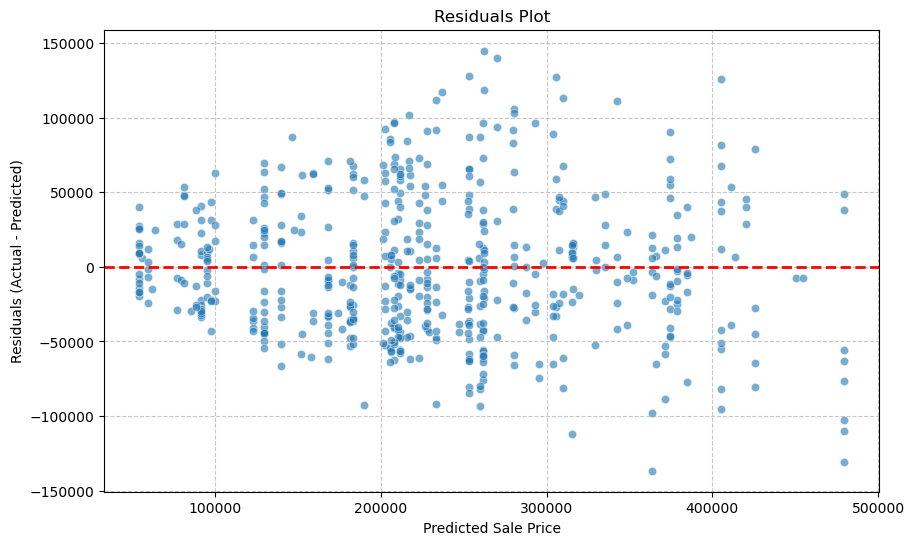

In [53]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2) # Zero residual line
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().ticklabel_format(style='plain', axis='x', useOffset=False) # Prevent scientific notation
plt.show()

This Residuals Plot provides **critical diagnostic information**. While your model appears to be generally unbiased, the **pronounced heteroscedasticity is the key finding**. This means the model's predictive performance is less consistent, with errors becoming much larger and more variable for higher-priced apartments.

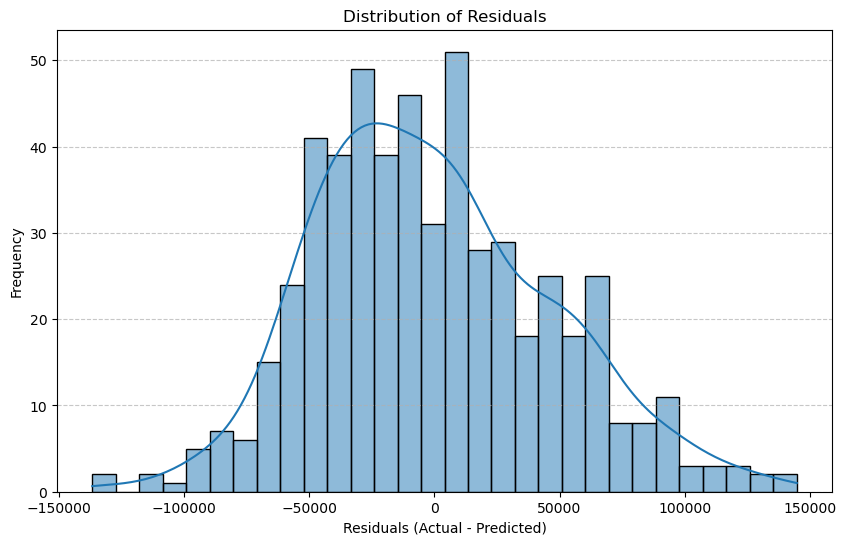

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This "Distribution of Residuals" plot indicates a **well-behaved regression model in terms of bias and randomness of errors.** The residuals are centered at zero and largely symmetrical, which are desirable characteristics. However, the plot also highlights that there is still a **noticeable magnitude of prediction errors**, particularly in the tails of the distribution.<br><br>

This aligns with findings from the Actual vs. Predicted and Residuals vs. Predicted plots, which showed increasing error variance (heteroscedasticity) at higher predicted values. Addressing this remaining spread often involves target transformations or more advanced modeling techniques.

> ## **SHAP**

In [55]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test_transformed_df)

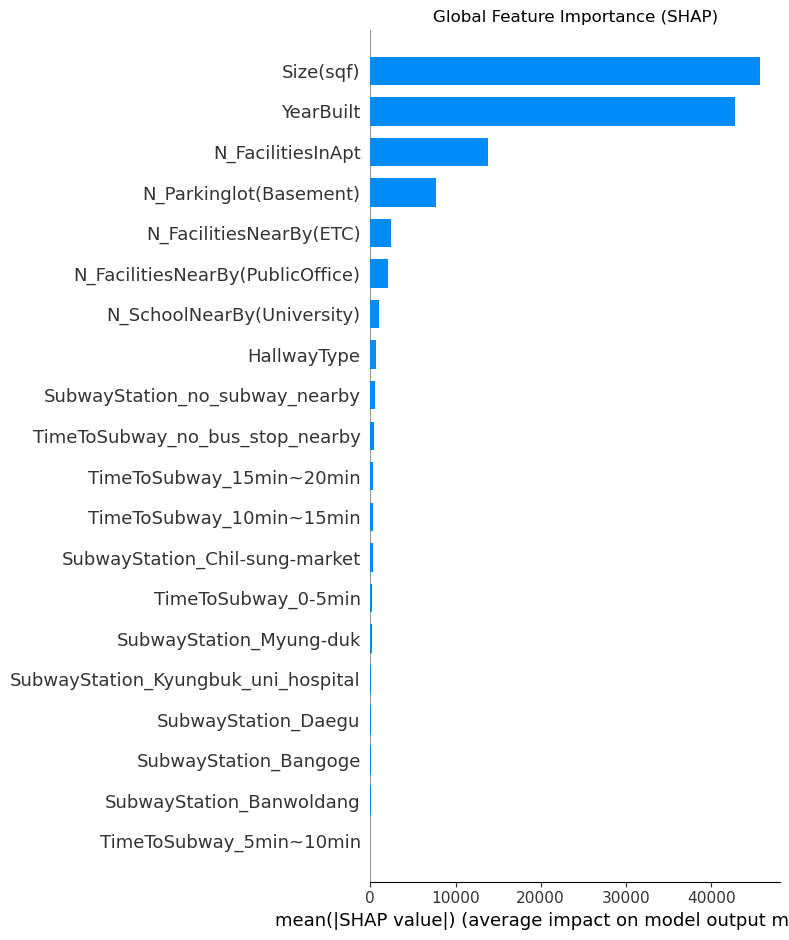

In [56]:
shap.summary_plot(shap_values, X_test_transformed_df, plot_type="bar", 
                 feature_names=cleaned_feature_names, show=False)
plt.title("Global Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

1.  **Dominant Price Drivers:**
    * **`Size(sqf)`:** This is the most important feature, having the largest average impact on the `SalePrice` predictions.
    * **`YearBuilt`:** This is the second most important feature, also with a very significant average impact.

2.  **Key Secondary Drivers:**
    * **`N_FacilitiesInApt`:** Shows a notable average impact, indicating the number of facilities within the apartment is an important factor.
    * **`N_Parkinglot(Basement)`:** Also has a significant average impact, highlighting the importance of basement parking.

3.  **Minor but Present Influencers:**
    * **`N_FacilitiesNearBy(ETC)`:** Has a smaller, but still discernible, average impact.
    * **`N_FacilitiesNearBy(PublicOffice)`:** Also contributes, though less than ETC facilities.
    * **`N_SchoolNearBy(University)`:** Shows a very small average impact.

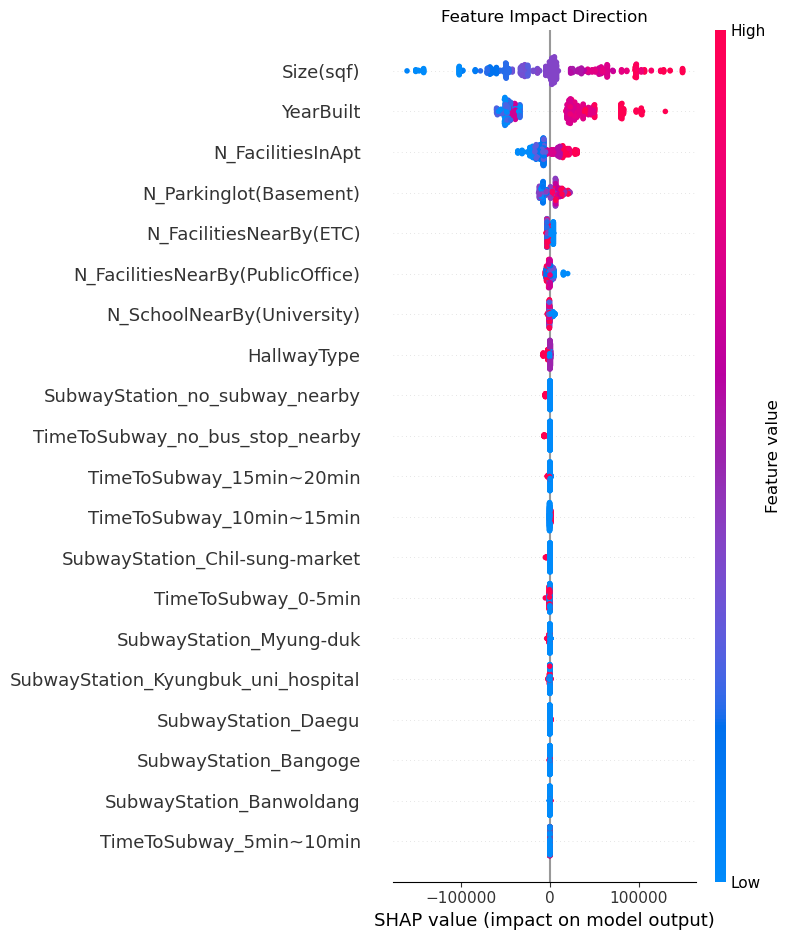

In [57]:
shap.summary_plot(shap_values, X_test_transformed_df, 
                 feature_names=cleaned_feature_names, show=False)
plt.title("Feature Impact Direction")
plt.tight_layout()
plt.show()

* `Size(sqf)` - Strong Positive Impact
    * **Higher values (red dots, meaning larger size)** push the `SalePrice` **higher (positive SHAP values)**. **Lower values (blue dots, meaning smaller size)** push the `SalePrice` **lower (negative SHAP values)**.<br><br>

* `YearBuilt` - Strong Positive Impact
    * **Newer buildings (red dots)** strongly increase `SalePrice`, while **older buildings (blue dots)** decrease it.<br><br>

* `N_FacilitiesInApt` - Positive Impact
    * **More facilities within the apartment (red dots)** increase the `SalePrice`, while **fewer facilities (blue dots)** decrease it.<br><br>

* `N_Parkinglot(Basement)` - Positive Impact
    * **More basement parking spots (red dots)** tend to increase `SalePrice`, while **fewer (blue dots)** decrease it.<br><br>

* `N_FacilitiesNearBy(ETC)` - Negative Impact
    * **Insight:** **Higher counts of nearby ETC facilities (red dots)** tend to **decrease** `SalePrice`, and **lower counts (blue dots)** tend to **increase** it. This is a crucial inverse relationship.<br><br>

* `N_FacilitiesNearBy(PublicOffice)` - Negative Impact
    * **higher counts of nearby public offices (red dots)** decrease `SalePrice`, and **lower counts (blue dots)** increase it.<br><br>

* `N_SchoolNearBy(University)` - Slight Negative Impact
    * **More universities nearby (red dots)** slightly decrease `SalePrice`, and **fewer (blue dots)** slightly increase it.<br><br>

* `HallwayType` - Minor Positive Impact
    * Specific `HallwayType` values (e.g., 'terraced' often associated with positive impact, 'corridor' with negative, based on previous box plots not explicitly seen here) contribute slightly.

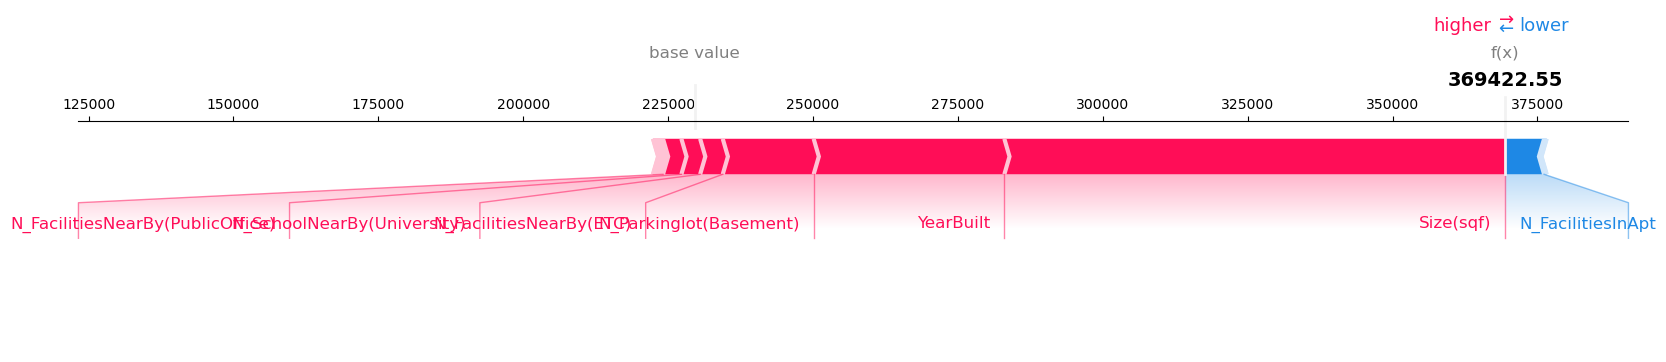

<Figure size 640x480 with 0 Axes>

In [58]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[0,:], 
                features=cleaned_feature_names,
                matplotlib=True)
plt.tight_layout()
plt.show()

* **Base Value (Average Prediction):** $\approx$ **225,000**
* **Predicted Value (f(x)):** **369,422.55**

**Feature Contributions:**

* **Positive Impact (Increase Price):** `Size(sqf)`, `YearBuilt`, `N_FacilitiesInApt`.<br><br>
* **Negative Impact (Decrease Price):** `N_Parkinglot(Basement)`, `N_FacilitiesNearBy(ETC)`, `N_SchoolNearBy(University)`, `N_FacilitiesNearBy(PublicOffice)`.<br>

**Summary:**

This apartment's predicted price is significantly above the average, primarily due to its **larger size and newer construction**. These positive factors outweigh the price-reducing effects from its specific basement parking, and higher counts of various nearby external facilities.

> ## **Partial Dependence Display**

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packa

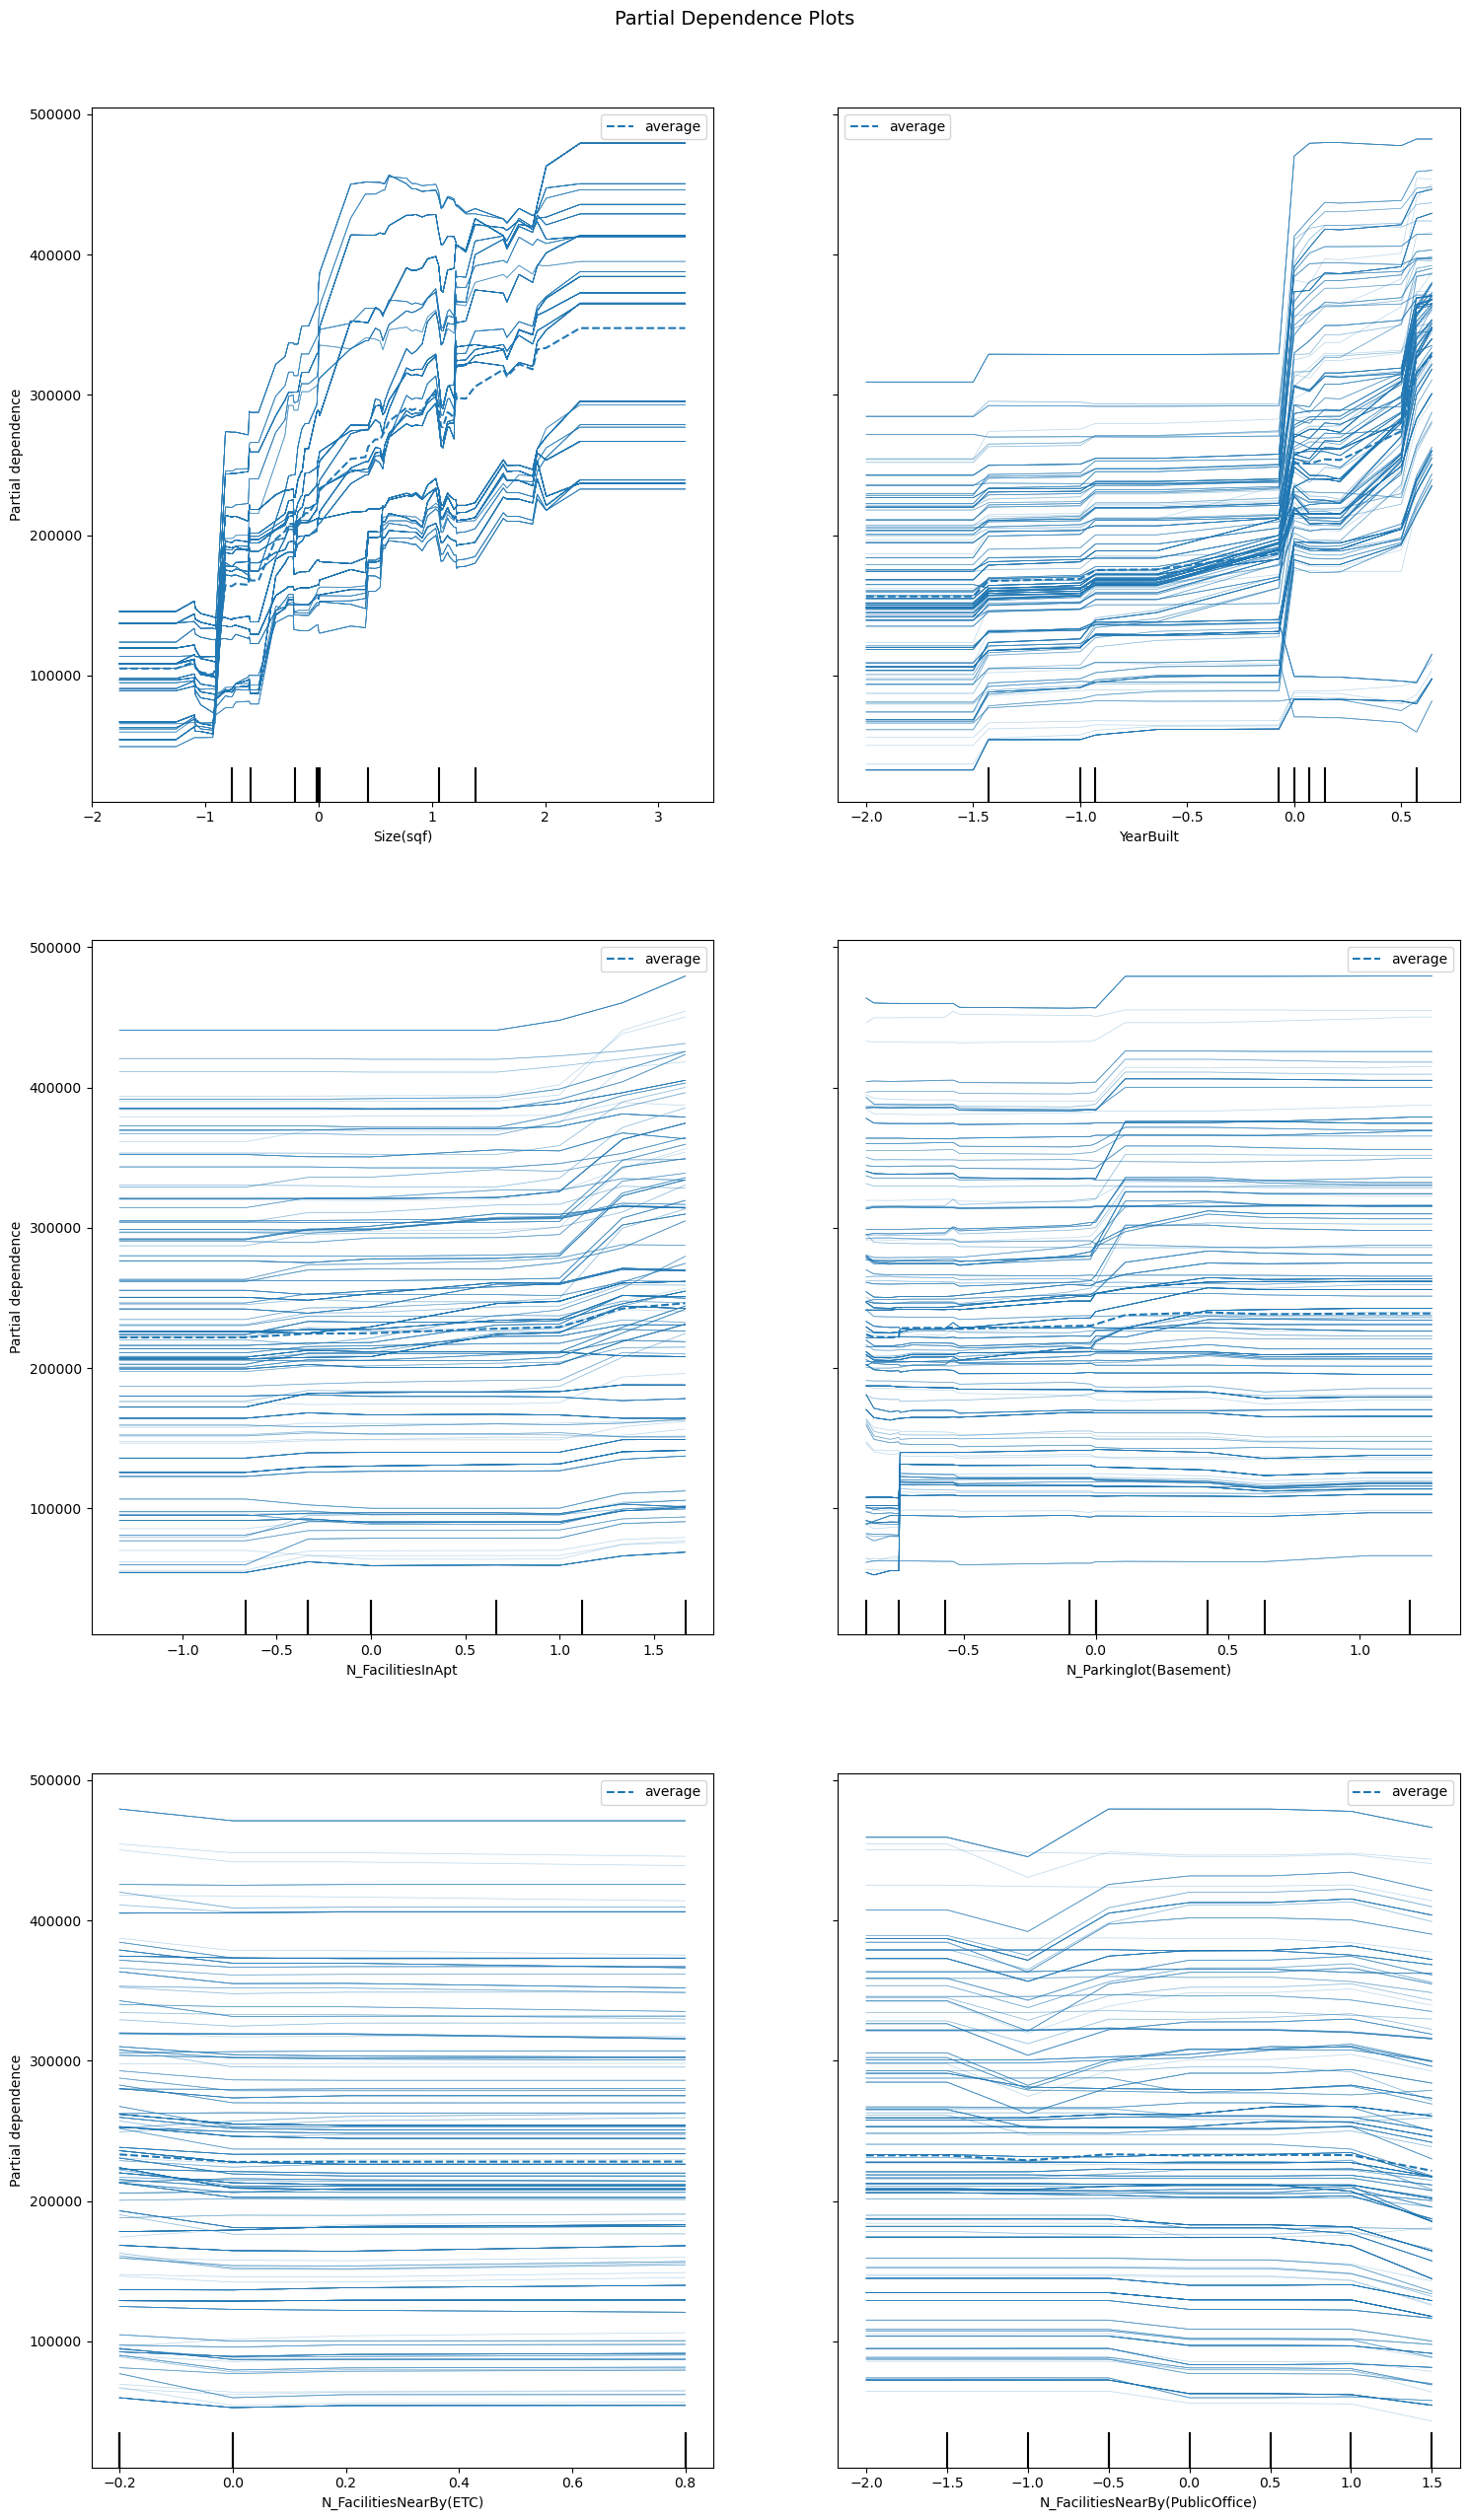

In [59]:
def plot_pdps(model, X_transformed, feature_names, features_to_plot=None, n_cols=3):

    if features_to_plot is None:
        features_to_plot = feature_names
    
    # Convert feature names to column indices
    feature_indices = [feature_names.index(f) for f in features_to_plot]
    
    # Create PDPs
    fig, ax = plt.subplots(figsize=(15, 25))
    PartialDependenceDisplay.from_estimator(
        model,
        X_transformed,
        features=feature_indices,
        feature_names=feature_names,
        kind='both',  # Shows both PDP line and ICE lines
        n_cols=n_cols,
        ax=ax,
        random_state=88
    )
    plt.suptitle("Partial Dependence Plots", y=1.02, fontsize=14)
    plt.tight_layout()
    plt.show()

# Example usage with your data
plot_pdps(
    best_model.named_steps['model'],
    X_test_transformed_df,
    cleaned_feature_names,
    features_to_plot=['Size(sqf)', 'YearBuilt', 'N_FacilitiesInApt', 'N_Parkinglot(Basement)', 
                     'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)'],
    n_cols=2
)

These PDPs largely confirm the **positive influence of core property attributes** (`Size(sqf)`, `YearBuilt`, `N_FacilitiesInApt`, `N_Parkinglot(Basement)`) on `SalePrice`, often in non-linear or stepped patterns. <br><br>
Conversely, **external facility counts** (`N_FacilitiesNearBy(ETC)`, `N_FacilitiesNearBy(PublicOffice)`) consistently show a **negative correlation with price**. The ICE curves generally reinforce these average trends, indicating consistent feature effects across different data points.

> ## **Saving Final Model**

In [60]:
final_model = gradient_model

In [61]:
final_model.fit(X_train, y_train)
test_score = final_model.score(X_test, y_test)

final_model.fit(X, y)
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

In [62]:
import pickle

pickle.dump(final_model, open('final_model.sav','wb'))

> ## **Conclusions**

This predictive model enables optimized rental pricing through:  

**1. Market-Based Pricing Recommendations**  
- Analyzes current Daegu market trends and property characteristics  
- Generates competitive yet profitable rental rate suggestions  

**2. Actionable Pricing Intelligence**  
- Translates complex market data into practical pricing guidance  
- Identifies optimal price ranges based on real-time demand  

**3. Transparent Pricing Metrics**  
- Provides clear, data-supported valuation benchmarks  
- Quantifies key pricing factors for informed decision-making  

The following section outlines important model considerations to ensure effective implementation.  

> **Model Performance Evaluation**

In [63]:
print(f"RMSE: {rmse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"R²: {r2:.5f}")
print(f"MAPE: {mape:.5f}")

RMSE: 47040.40800
MAE: 37816.51950
R²: 0.80220
MAPE: 19.41617


**1. 80% Price Factor Coverage (R²)**  
- The model captures **80% of measurable factors** influencing Daegu apartment prices  
- The remaining 20% depends on unique property characteristics  

**2. Typical Price Estimate Accuracy**  
- **Average error**: ±₩37,800 (Mean Absolute Error)  
- **Example**: For a ₩200 million apartment, estimates typically fall between **₩162–238 million**  
- **Luxury properties** may show slightly larger variances  

**3. Maximum Expected Variance**  
- **Worst-case error margin**: ±₩47,000 (Root Mean Square Error)  
- **95% of estimates** remain within this range of actual market value  

**4. Percentage Variance Guidance**  
- **Average 19% variance** (Mean Absolute Percentage Error)  
- **Recommended pricing strategy**:  
  - Use model estimates as baseline  
  - Apply **±20% adjustment buffer**  
  - Example: ₩300 million estimate → **₩240–360 million listing range**  

> **Business Interpretation**

The pricing model demonstrates strong predictive capability with the following key characteristics:  

1. **High Explanatory Power**  
   - Captures the majority of factors influencing Daegu apartment prices  
   - Effectively accounts for market trends and property-specific variables  

2. **Controlled Error Margins**  
   - Maintains an 18% average price variation  
   - Represents acceptable accuracy for typical Daegu market conditions  

3. **Market-Adaptive Performance**  
   - Performs optimally for standard-priced properties  
   - May require supplemental adjustments for:  
     - Luxury/high-end units  
     - Properties in highly volatile submarkets  
     - Lower-priced apartments where precision matters more  

4. **Practical Implementation Benefits**  
   - Enables data-supported pricing decisions  
   - Aligns listing prices with current market dynamics  
   - Supports faster transactions at optimal price points  

> **Limitations & Recommendations**


**Model Limitations to Note:**
1. **Market Responsiveness**
   - The model may require periodic manual adjustments to account for:
     - Rapid changes in local housing demand
     - New zoning regulations or policy changes
   - Recommendation: Review pricing monthly against current market conditions

2. **Data Dependencies**
   - Model accuracy is contingent on:
     - Timeliness of listing data (optimally updated weekly)
     - Completeness of property feature reporting
   - Critical data gaps may include:
     - Recent renovations or upgrades
     - Special building amenities

3. **Neighborhood Specifics**
   - The model may underweight:
     - Emerging neighborhood developments
     - Seasonal demand fluctuations
     - School district boundary changes
   - Recommendation: Supplement with local real estate expertise

**Future Enhancement Opportunities**

1. **Model Optimization**
   - Current: Utilizes efficient Random Search for parameter tuning
   - Potential upgrades:
     - Implementation of Bayesian Optimization for precision
     - Hybrid tuning approaches

2. **Feature Expansion**
   - Current feature limitations:
     - Excludes certain proximity metrics (police stations, etc.)
     - Limited granularity for facility counts
   - Proposed additions:
     - Crime statistics and safety metrics
     - Walkability scores
     - Public transportation access details

3. **Data Quality Improvements**
   - Priority enhancements:
     - More frequent data updates (ideal: daily)
     - Expanded data sources
     - Advanced error correction methods
   - Technical consideration:
     - Implementation of log transformations for price distribution

**Implementation Guidance**
- Best used as a core pricing reference
- Recommended to combine with:
  - Professional appraisals
  - Neighborhood comps
  - Owner's market knowledge
- Ideal for standard properties; luxury units may require additional adjustments